In [1]:
#목표 : 합성곱 층의 가중치와 특성 맵을 그림으로 시각화하기

일반적으로 절편은 시각적으로 의미가 있지 않다.


가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

In [4]:
#체크포인트 파일(최적의 에포크까지 훈련한 모델 파라미터 저장)을 읽어들이기
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [6]:
#케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다.
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [8]:
#첫번째 합성곱 층의 가중치 조사하기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) #weights도 파이썬 리스트이다. 첫 번째 원소는 가중치, 두 번째 원소는 절편이다.

(3, 3, 1, 32) (32,)


커널 크기 (3, 3, 1) x 필터 개수(32) -> (3, 3, 1, 32)


필터마다 1개의 절편이 있으므로 (32, ) 크기가 된다.

In [11]:
#weights 속성을 넘파이 배열로 변환하기
conv_weights = conv.weights[0].numpy() #가중치
print(conv_weights.mean(), conv_weights.std())

-0.00833426 0.23601355


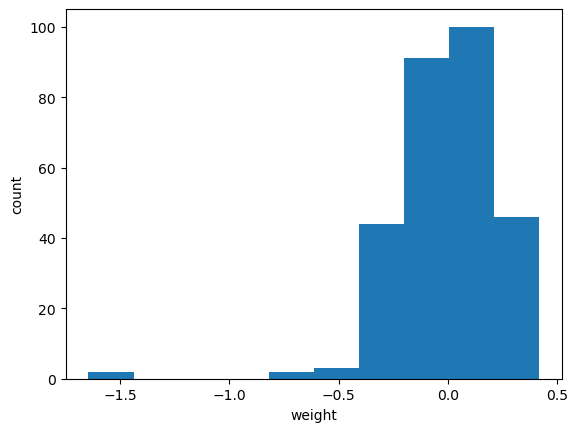

In [13]:
#가중치가 어떤 분포를 가졌는지 히스토그램으로 그려서 알아보기
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

히스토그램을 그리기 위해 conv_weights 배열을 1개의 열이 있는 1차원 배열로 변환했다.

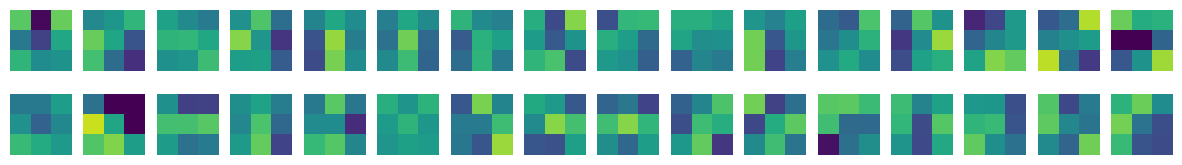

In [18]:
#커널 출력하기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) #[:,:,0,0]에서 [:,:,0,31] 까지 출력
        #vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위 지정
        axs[i, j].axis('off')
plt.show()

In [20]:
#훈련하지 않은 빈 합성곱 신경망 만든 후 훈련한 합성곱 신경망의 가중치와 어떻게 다른지 그림으로 비교하기
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#Conv2D층의 가중치를 변수에 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [26]:
#이전처럼 넘파이 배열로 만든 후 평균과 표준편차 확인
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0003053067 0.08201523


평균은 이전과 동일하게 0에 가깝지만, 표준편차는 이전과 달리 매우 작다.

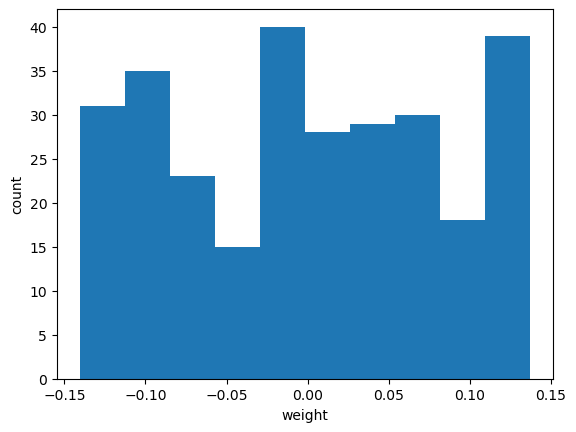

In [29]:
#가중치 배열을 히스토그램으로 표현
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

가중치가 이전과 달리 비교적 고른 분포를 보임을 알 수 있다.


이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

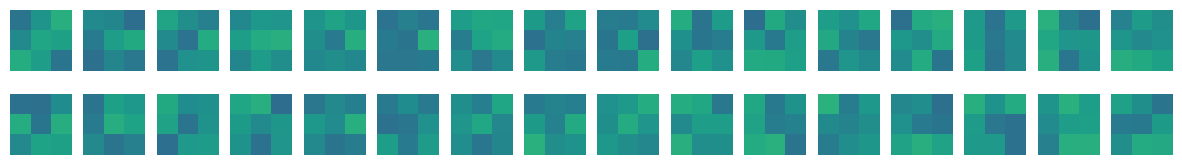

In [32]:
#이 가중치 값을 커널로 출력하기

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) #[:,:,0,0]에서 [:,:,0,31] 까지 출력
        #vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위 지정
        axs[i, j].axis('off')
plt.show()

전체적으로 가중치가 밋밋하게 초기화 되었음을 알 수 있다.

지금까지는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 하지만, 딥러닝에서는 좀 더 복잡한 모델이 많이 있다.

예를 들어 입력이 2개일 수도 있고 출력이 2개일 수도 있다. 이런 경우는 Sequential 클래스를 사용하기 어렵기 때문에 대신 함수형 API를 사용한다.

Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 주지만 Model 클래스에서는 우리가 수동으로 만들어 호출해야 한다.

In [37]:
#model.input으로 이 모델의 입력을 간단히 얻을 수 있다.
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [39]:
#model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.
conv_acti = keras.Model(model.inputs, model.layers[0].output)

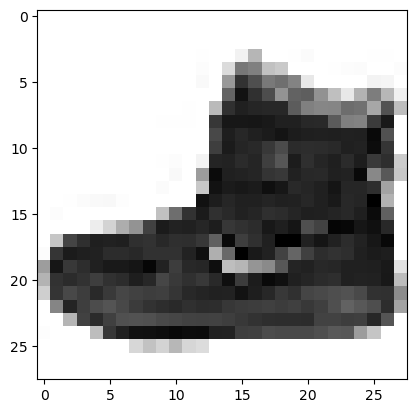

In [41]:
#특성 맵 시각화

#훈련 세트에 있는 첫 번째 샘플 그리기
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [45]:
#이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력하기

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [47]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩과 32개의 필터를 사용한 합성곱의 출력이므로 (28, 28, 32)이다.

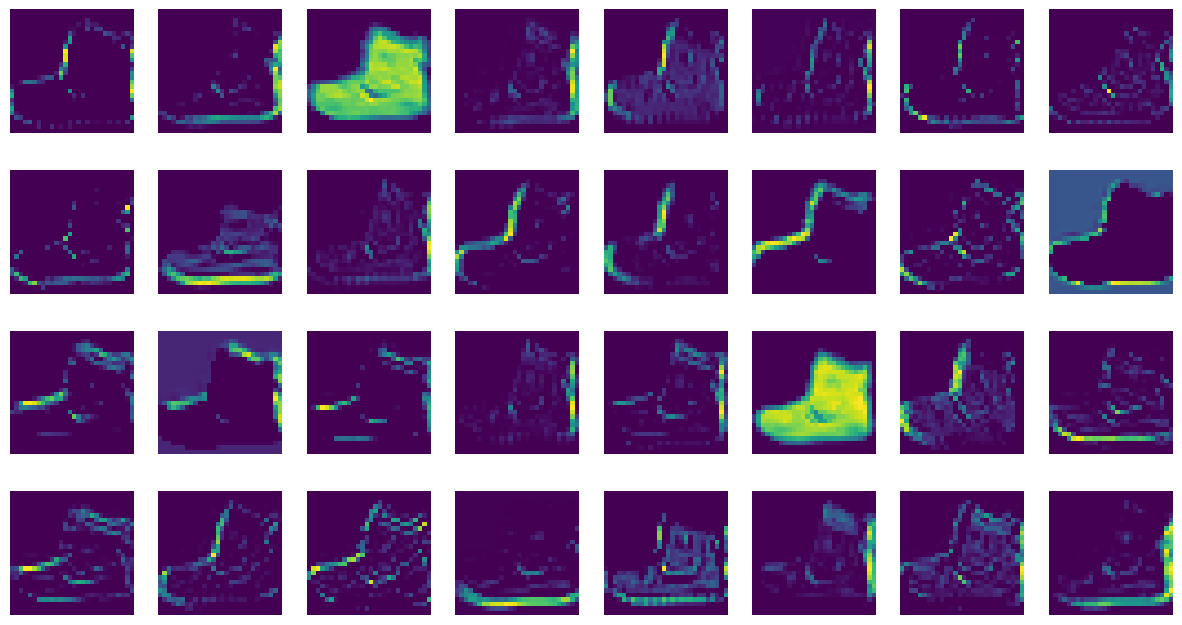

In [50]:
#32개의 특성맵 그리기
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i,j].axis('off')
plt.show()

In [52]:
#두 번째 합성곱 층이 만든 특성 맵도 확인
conv2_acti = keras.Model(model.inputs, model.layers[2].output) #conv2_acti 모델 만들기

In [54]:
#첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [56]:
print(feature_maps.shape)

(1, 14, 14, 64)


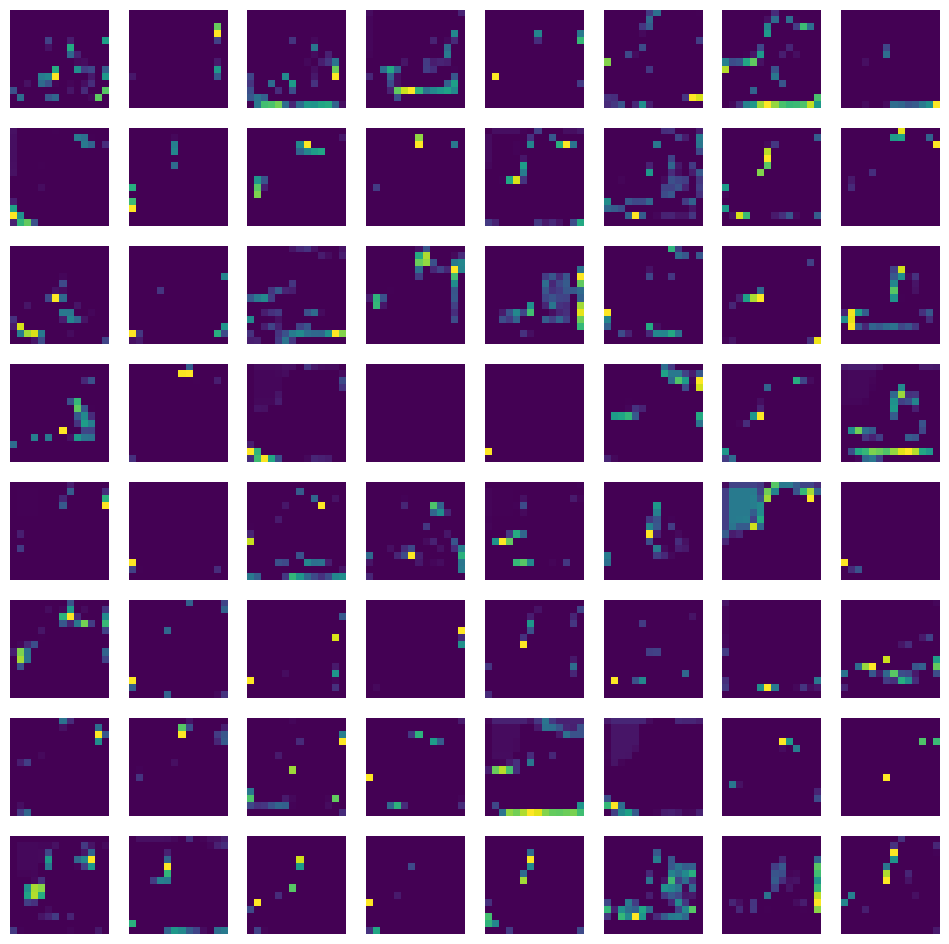

In [58]:
#64개의 특성 맵 그리기
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

이 특성 맵은 시각적으로 이해하기 어렵다.
-> 두 번째 합성곱 층의 필터 크기는 (3,3,32)이다. 두 번째 합성곱 층의 첫 번째 필터가 앞서 첫 번째 합성곱 층에서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다. 이렇게 계산된 출력은 어떤 부위를 감지하는지 직관적으로 이해하기가 어렵게 된다.


이런 현상은 합성곱 층을 많이 쌓을수록 심해진다.


이를 바꾸어 생각하면 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다.